<a href="https://colab.research.google.com/github/cristiangomez811/aprendizaje_python/blob/master/python_deep_learning/Cap5_Redes_Neuronales_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cap5  Redes neuronales en Keras

En este capitulo se aborda el problema de reconocimiento de  
  dígitos **MNIST** presentada en el Cap4 de forma teoríca;    
está vez usando la api **Keras** 

In [1]:
#Comando para especificar la versión de TensorFlow
%tensorflow_version 2.x

In [2]:
#Importar la libreria TF
import tensorflow as tf

#Validar si hay disponible una GPU
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Versión de TF 
print(tf.__version__)

2.3.0


In [4]:
#Para Keras
from tensorflow import keras
print(tf.keras.__version__)

2.4.0


In [5]:
# Precarga de datos
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


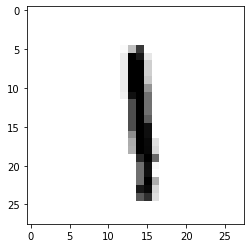

In [6]:
# visualización de los datos
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [7]:
#etiqueta correspondiente
print(y_train[8])

1


In [8]:
#forma del set
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


## Preprocesado de datos de entrada

En esta parte se va a hacer una normalización y re escalado de los datos de entrada

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [10]:
# reescalado a 1D para entrar al modelo

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Aúnque se ha cambiado la forma del tensor no cambia el total de datos por lo tanto no hay que cambiar el etiquetado. 

In [12]:
# Etiquetado por one-hot encoding usando la funcion de soporte to_categorical
from tensorflow.keras.utils import to_categorical

In [13]:
#efectos antes y despues del to_categorical
print(y_test[0])
print(y_train[0])
print(y_test.shape)
print(y_train.shape)

7
5
(10000,)
(60000,)


In [14]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [15]:
print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


## Definición del modelo

La estructura de datos principal en Keras es la clase *Sequential*, que permite la creación de una neurona básica. Kerans ofrece también una API que permite implementar modelos complejos en forma de grafo. 

In [16]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = keras.Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

En este paso se define una red de dos capas full-conected de 10 neuronas cada una, con 255 parametros de entrada y una funión *softmax* de salida

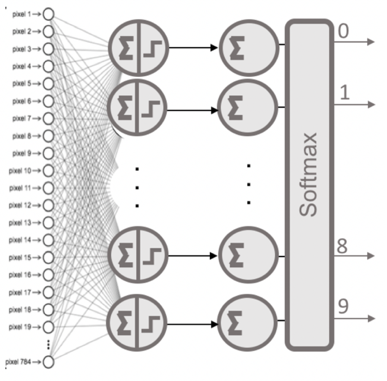

In [17]:
# comprobando la arquitectura
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [18]:
# proceso de entrenado
model.compile(loss='categorical_crossentropy', #función de coste crosentropia categorica
    optimizer='sgd', # optimizador stocastig gradient descent (sgd)
    metrics = ['accuracy']) # la metrica


In [19]:
# entrenamiento
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9700 - accuracy: 0.4445
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3689 - accuracy: 0.7312
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0132 - accuracy: 0.7796
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8131 - accuracy: 0.8233
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6916 - accuracy: 0.8472


## Evaluación del modelo

Ahora que el modelo está entrenado, se evaluará contra   
datos nuevos de prueba (test) para esto se puede usar el metodo *evaluate()*

In [20]:
# este metodo indica que tan bien se ajusta el modelo a datos que nunca ha visto
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6276 - accuracy: 0.8607


In [21]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8607000112533569


Existen otras metricas además del *accuracy* como el *Recall*.  
Aúnque para este ejercicio es suficiente con el accuracy voy a  
dejar las formulas para ser tenidas en cuenta. 



*   **VP**, cantidad de positivos clasificados correctamente

*   **VN**, cantidad de negativos clasificados correctamente

*   **FV**, cantidad de positivos clasificados incorrectamente

*   **FP**, cantidad de negativos clasificados incorrectamente


accuracy = (VP + VN)/(VP + FP + VN + FN)

recall = VP/(VP + FN)

## Generación de predicciones

Finalmente se puede usar el metodo *predict()* de un modelo ya entrenado

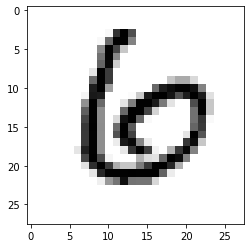

In [22]:
# visualizamos la imagen para comprobar por nosotros si el modelo predice correctamente

x_test_old = x_test.reshape(10000, 28,28) # re escalada para visualizar el dato original
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [23]:
predictions = model.predict(x_test)

In [24]:
import numpy as np
#dado que la respuesta es un array de probabilidades 
print(predictions[11],'\n')
# se puede usar la función argmax para obtener el indice con mayor probabilidad
print(np.argmax(predictions[11]),'\n')
#finalmente para comprobar que es una distribución correcta 
print(np.sum(predictions[11]))

[0.13915044 0.03614991 0.09302074 0.02540314 0.13713662 0.08710387
 0.38188213 0.00317873 0.08106826 0.01590626] 

6 

1.0000001


## Todos los pasos seguidos

### Carga de datos


In [25]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [28]:
print("train_images.shape: ", train_images.shape)
print("len(train_labels): ",len(train_labels))
print("test_images: ", test_images.shape)
print("len(test_labels): ", len(test_labels))

train_images.shape:  (60000, 28, 28)
len(train_labels):  60000
test_images:  (10000, 28, 28)
len(test_labels):  10000


In [29]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

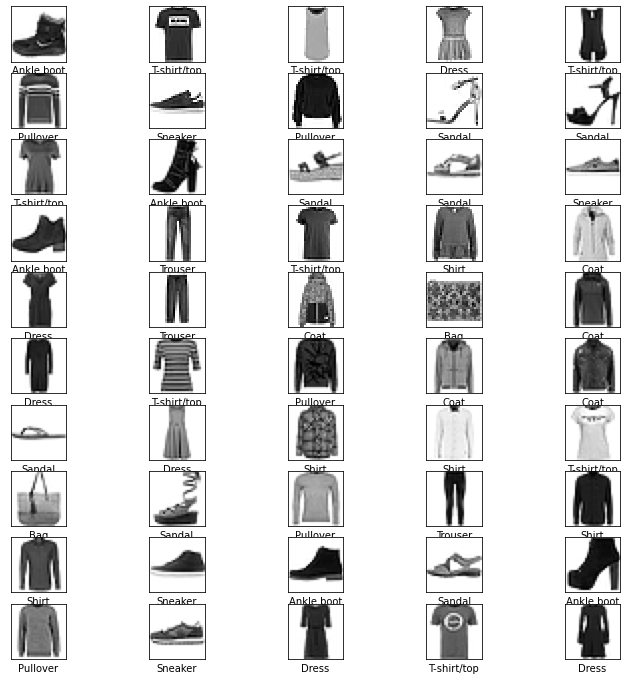

In [30]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Creación y configuración del modelo

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28))) #igual a un np.reshape pero de keras
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenamiento del modelo

In [34]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8485 - accuracy: 0.4920
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2661 - accuracy: 0.7072
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9877 - accuracy: 0.7402
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8413 - accuracy: 0.7602
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7529 - accuracy: 0.7739


### Evaluación y prediciones

In [35]:
# evaluacion del modelo
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.7338 - accuracy: 0.7678
Test accuracy:  0.767799973487854


In [36]:
# predecir
predictions = model.predict(test_images)
print("Para la un caso particular")
print("Vector de probabilidades: ", predictions[5])
print("Mayor probabilidad: ",np.argmax(predictions[5]))
print("Respuesta: ",test_labels[5])

Para la un caso particular
Vector de probabilidades:  [1.7712500e-02 8.5602731e-01 2.5128230e-02 3.7376530e-02 3.0443970e-02
 7.1687098e-03 2.2839695e-02 7.6012977e-04 2.2161475e-03 3.2675537e-04]
Mayor probabilidad:  1
Respuesta:  1


### Oportunidad de explicación 

Dado que este data set tiene un componente  
 gráfico muy importante permite apoyar de una  
  forma visual el entendimiento de la salida del modelo. 

In [38]:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

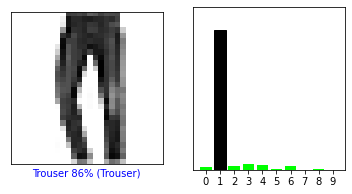

In [39]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()